c:\ProgramData\anaconda3\envs\forex_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Results for USDCAD:
Start                     2021-02-02 00:00:00
End                       2023-12-29 00:00:00
Duration                   1060 days 00:00:00
Exposure Time [%]                   85.865258
Equity Final [$]                   8297.75487
Equity Peak [$]                   15045.65364
Return [%]                         -17.022451
Buy & Hold Return [%]                3.701907
Return (Ann.) [%]                   -6.022789
Volatility (Ann.) [%]               30.755365
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                  -69.243186
Avg. Drawdown [%]                   -5.225292
Max. Drawdown Duration      543 days 00:00:00
Avg. Drawdown Duration       43 days 00:00:00
# Trades                                  303
Win Rate [%]                        39.273927
Best Trade [%]                        2.70024
Worst Trade [%]                     -2.135986
Avg. Trade [%]

c:\ProgramData\anaconda3\envs\forex_env\Lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
c:\ProgramData\anaconda3\envs\forex_env\Lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
c:\ProgramData\anaconda3\envs\forex_env\Lib\site-packages\backtesting\_plotting.py:456: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample(resample_rule, label='left')
c:\ProgramData\anaconda3\envs\forex_env\Lib\site-packages\backtesting\_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  fig = gridplot(
c:\ProgramData\anaconda3\envs\forex_env\Lib\site-packages\

Results for GBPUSD:
Start                     2021-02-02 00:00:00
End                       2023-12-29 00:00:00
Duration                   1060 days 00:00:00
Exposure Time [%]                   60.501982
Equity Final [$]                   16005.9811
Equity Peak [$]                   16280.37486
Return [%]                          60.059811
Buy & Hold Return [%]               -6.854266
Return (Ann.) [%]                   16.951056
Volatility (Ann.) [%]                17.32436
Sharpe Ratio                         0.978452
Sortino Ratio                         1.96307
Calmar Ratio                         1.563949
Max. Drawdown [%]                  -10.838625
Avg. Drawdown [%]                   -3.425833
Max. Drawdown Duration      138 days 00:00:00
Avg. Drawdown Duration       37 days 00:00:00
# Trades                                  156
Win Rate [%]                        46.794872
Best Trade [%]                       1.890161
Worst Trade [%]                     -1.098374
Avg. Trade [%]

c:\ProgramData\anaconda3\envs\forex_env\Lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
c:\ProgramData\anaconda3\envs\forex_env\Lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
c:\ProgramData\anaconda3\envs\forex_env\Lib\site-packages\backtesting\_plotting.py:456: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample(resample_rule, label='left')
c:\ProgramData\anaconda3\envs\forex_env\Lib\site-packages\backtesting\_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  fig = gridplot(
c:\ProgramData\anaconda3\envs\forex_env\Lib\site-packages\

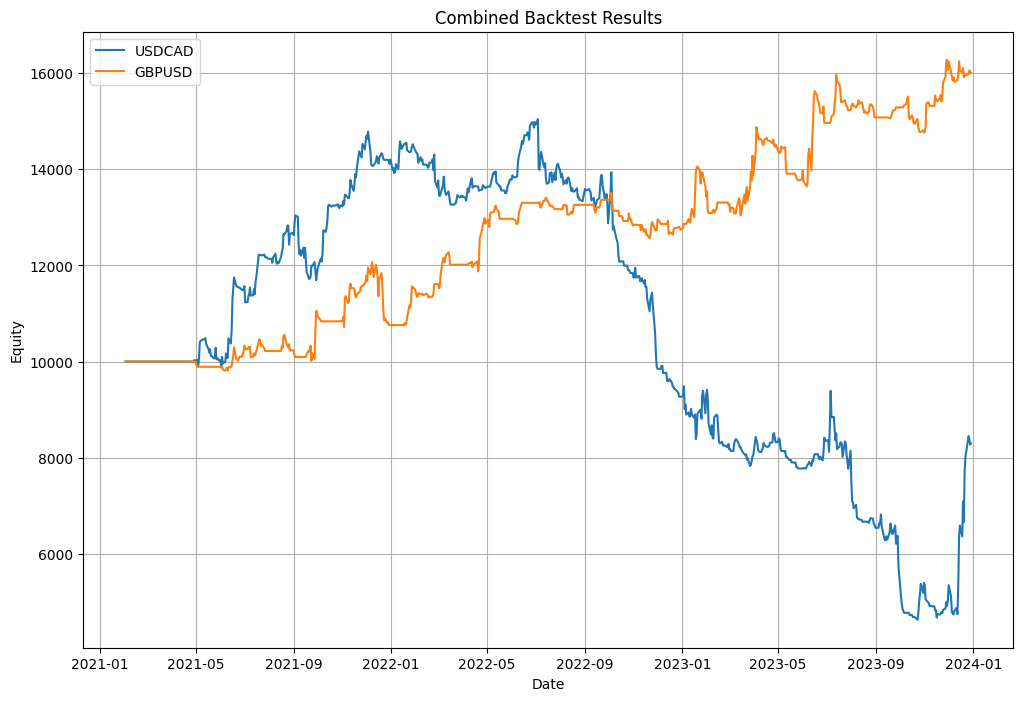

True

In [1]:
import MetaTrader5 as mt5
from backtesting import Backtest, Strategy
import pandas as pd
from datetime import datetime
import pytz
import matplotlib.pyplot as plt

# Function to calculate SL and TP prices
def calculate_prices(entry_price, risk_reward_ratio, order_type, mean_candle_size):
    risk_part, reward_part = map(int, risk_reward_ratio.split(':'))
    risk_amount = mean_candle_size * risk_part
    reward_amount = mean_candle_size * reward_part
    
    if order_type == 'buy':
        sl_price = entry_price - risk_amount
        tp_price = entry_price + reward_amount
    elif order_type == 'sell':
        sl_price = entry_price + risk_amount
        tp_price = entry_price - reward_amount
    else:
        raise ValueError("order_type must be either 'buy' or 'sell'")
    
    return sl_price, tp_price

# Set timezone to UTC
utc_tz = pytz.utc

# Initialize MT5 connection
if not mt5.initialize():
    print("Failed to initialize MT5")
    exit()

login = 51708234
password = "4bM&wuVJcBTnjV"
server = "ICMarketsEU-Demo"
if not mt5.login(login, password, server):
    print("Failed to login to MT5")
    mt5.shutdown()
    exit()

# Define currency pairs with their respective mean candle sizes and risk-reward ratios
currency_pairs = {
    "USDCAD": {"mean_candle_size": 0.0088, "risk_reward_ratiosell": "3:4", "risk_reward_ratiobuy": "1:2"},
    "GBPUSD": {"mean_candle_size": 0.011, "risk_reward_ratiosell": "1:2", "risk_reward_ratiobuy": "1:2"}
}

timeframe = mt5.TIMEFRAME_D1

# Define start date and end date
start_date = datetime(2021, 2, 2, 0, 0, 0, tzinfo=utc_tz)
end_date = datetime(2023, 12, 29, 0, 0, 0, tzinfo=utc_tz)

combined_results = []

for symbol, params in currency_pairs.items():
    # Retrieve OHLC data from MetaTrader
    rates = mt5.copy_rates_range(symbol, timeframe, start_date, end_date)
    if rates is None:
        print(f"Failed to retrieve data for {symbol}")
        continue

    ohlc_data = pd.DataFrame(rates)
    ohlc_data['time'] = pd.to_datetime(ohlc_data['time'], unit='s')
    ohlc_data.set_index('time', inplace=True)

    # Select only the required columns
    df = ohlc_data[['open', 'high', 'low', 'close']]
    df.columns = ['Open', 'High', 'Low', 'Close']

    # Load predictions from CSV files
    df_predsell = pd.read_csv(f'predict{symbol}_D1Sell.csv', index_col=0)
    df_predsell.index = pd.to_datetime(df_predsell.index)

    df_predbuy = pd.read_csv(f'predict{symbol}_D1Buy.csv', index_col=0)
    df_predbuy.index = pd.to_datetime(df_predbuy.index)

    # Define a simple strategy based on predictions
    class SimpleStrategy(Strategy):
        mean_candle_size = params["mean_candle_size"]
        risk_reward_ratiosell = params["risk_reward_ratiosell"]
        risk_reward_ratiobuy = params["risk_reward_ratiobuy"]

        def init(self):
            self.mean_candle_size = SimpleStrategy.mean_candle_size
            self.risk_reward_ratiosell = SimpleStrategy.risk_reward_ratiosell
            self.risk_reward_ratiobuy = SimpleStrategy.risk_reward_ratiobuy

        def next(self):
            current_time = self.data.index[-1]
            
            # Get predictions for the current time
            sell_prediction = df_predsell.loc[current_time, 'prediction'] if current_time in df_predsell.index else 0
            buy_prediction = df_predbuy.loc[current_time, 'prediction'] if current_time in df_predbuy.index else 0
            
            # Ensure no trade is placed if both predictions are 1
            if sell_prediction == 1 and buy_prediction == 1:
                return
            
            # Place a sell order if the sell prediction is 1
            if sell_prediction == 1 and buy_prediction != 1:
                entry_price = self.data.Close[-1]
                order_type = 'sell'
                sl_price, tp_price = calculate_prices(entry_price, self.risk_reward_ratiosell, order_type, self.mean_candle_size)
                self.sell(size=10000, sl=sl_price, tp=tp_price)
            
            # Place a buy order if the buy prediction is 1
            if buy_prediction == 1 and sell_prediction != 1:
                entry_price = self.data.Close[-1]
                order_type = 'buy'
                sl_price, tp_price = calculate_prices(entry_price, self.risk_reward_ratiobuy, order_type, self.mean_candle_size)
                self.buy(size=10000, sl=sl_price, tp=tp_price)

    # Create and run backtest with the SimpleStrategy
    bt = Backtest(df, SimpleStrategy, cash=10000, commission=0.0003, margin=0.01)
    output = bt.run()
    print(f"Results for {symbol}:")
    print(output)
    
    # Append to combined results
    combined_results.append((symbol, output))
    
    # Plot the results using Matplotlib
    bt.plot(filename=f"backtest_plot_{symbol}.html")
    
    # Use Bokeh to save and display the plot
    from bokeh.io import output_file, show
    output_file(f"backtest_plot_{symbol}.html")
    show(bt.plot())

# Plot combined results using Matplotlib
plt.figure(figsize=(12, 8))
for symbol, output in combined_results:
    plt.plot(output['_equity_curve'].index, output['_equity_curve']['Equity'], label=symbol)

plt.title('Combined Backtest Results')
plt.xlabel('Date')
plt.ylabel('Equity')
plt.legend()
plt.grid(True)
plt.show()

# Shutdown MT5 connection after data retrieval
mt5.shutdown()


Results for USDCAD:
Start                     2021-02-02 00:00:00
End                       2023-12-29 00:00:00
Duration                   1060 days 00:00:00
Exposure Time [%]                   69.749009
Equity Final [$]                  15154.92229
Equity Peak [$]                   17109.97738
Return [%]                          51.549223
Buy & Hold Return [%]                3.701907
Return (Ann.) [%]                   14.843142
Volatility (Ann.) [%]               20.973238
Sharpe Ratio                         0.707718
Sortino Ratio                        1.373013
Calmar Ratio                         1.064952
Max. Drawdown [%]                  -13.937856
Avg. Drawdown [%]                    -4.12231
Max. Drawdown Duration      443 days 00:00:00
Avg. Drawdown Duration       52 days 00:00:00
# Trades                                  289
Win Rate [%]                        40.484429
Best Trade [%]                       1.513695
Worst Trade [%]                      -0.93865
Avg. Trade [%]

c:\Users\Atharv\anaconda3\envs\my_env\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
c:\Users\Atharv\anaconda3\envs\my_env\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
c:\Users\Atharv\anaconda3\envs\my_env\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
c:\Users\Atharv\anaconda3\envs\my_env\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],


Results for GBPUSD:
Start                     2021-02-02 00:00:00
End                       2023-12-29 00:00:00
Duration                   1060 days 00:00:00
Exposure Time [%]                   60.501982
Equity Final [$]                   16005.9811
Equity Peak [$]                   16280.37486
Return [%]                          60.059811
Buy & Hold Return [%]               -6.854266
Return (Ann.) [%]                   16.951056
Volatility (Ann.) [%]                17.32436
Sharpe Ratio                         0.978452
Sortino Ratio                         1.96307
Calmar Ratio                         1.563949
Max. Drawdown [%]                  -10.838625
Avg. Drawdown [%]                   -3.425833
Max. Drawdown Duration      138 days 00:00:00
Avg. Drawdown Duration       37 days 00:00:00
# Trades                                  156
Win Rate [%]                        46.794872
Best Trade [%]                       1.890161
Worst Trade [%]                     -1.098374
Avg. Trade [%]

c:\Users\Atharv\anaconda3\envs\my_env\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
c:\Users\Atharv\anaconda3\envs\my_env\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
c:\Users\Atharv\anaconda3\envs\my_env\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
c:\Users\Atharv\anaconda3\envs\my_env\lib\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],


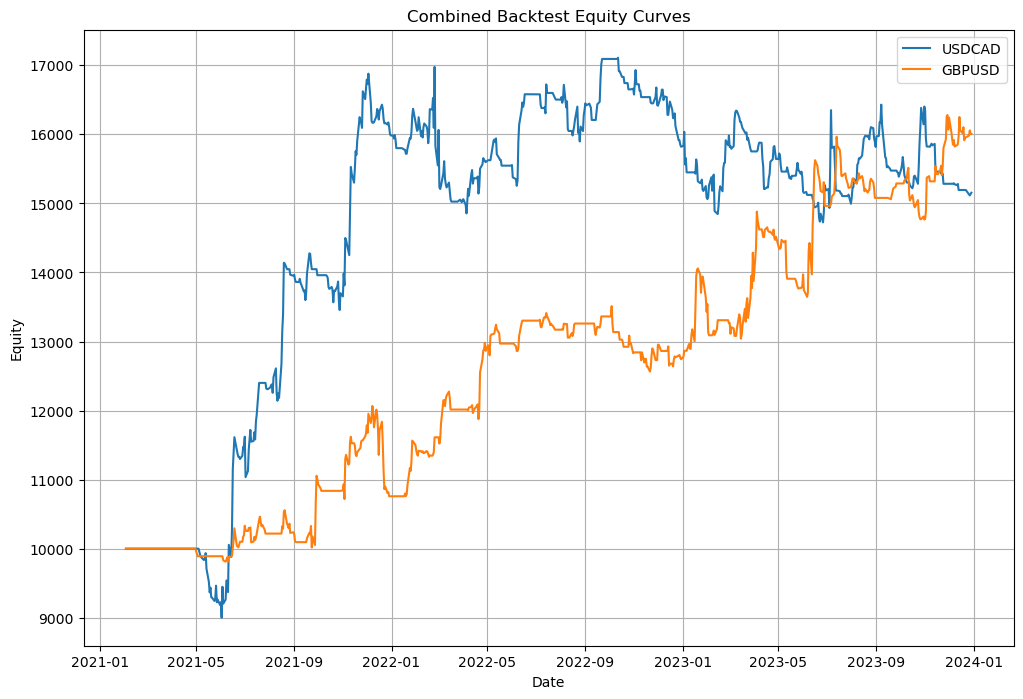

True

In [1]:
import MetaTrader5 as mt5
from backtesting import Backtest, Strategy
import pandas as pd
from datetime import datetime
import pytz
import matplotlib.pyplot as plt

# Function to calculate SL and TP prices
def calculate_prices(entry_price, risk_reward_ratio, order_type, mean_candle_size):
    risk_part, reward_part = map(int, risk_reward_ratio.split(':'))
    risk_amount = mean_candle_size * risk_part
    reward_amount = mean_candle_size * reward_part
    
    if order_type == 'buy':
        sl_price = entry_price - risk_amount
        tp_price = entry_price + reward_amount
    elif order_type == 'sell':
        sl_price = entry_price + risk_amount
        tp_price = entry_price - reward_amount
    else:
        raise ValueError("order_type must be either 'buy' or 'sell'")
    
    return sl_price, tp_price

# Set timezone to UTC
utc_tz = pytz.utc

# Initialize MT5 connection
if not mt5.initialize():
    print("Failed to initialize MT5")
    exit()

login = 51708234
password = "4bM&wuVJcBTnjV"
server = "ICMarketsEU-Demo"
if not mt5.login(login, password, server):
    print("Failed to login to MT5")
    mt5.shutdown()
    exit()

# Define currency pairs with their respective mean candle sizes and risk-reward ratios
currency_pairs = {
    "USDCAD": {"mean_candle_size": 0.0088, "risk_reward_ratiosell": "1:2", "risk_reward_ratiobuy": "1:2"},
    "GBPUSD": {"mean_candle_size": 0.011, "risk_reward_ratiosell": "1:2", "risk_reward_ratiobuy": "1:2"}
}

timeframe = mt5.TIMEFRAME_D1

# Define start date and end date
start_date = datetime(2021, 2, 2, 0, 0, 0, tzinfo=utc_tz)
end_date = datetime(2023, 12, 29, 0, 0, 0, tzinfo=utc_tz)

combined_equity_curves = pd.DataFrame()

for symbol, params in currency_pairs.items():
    # Retrieve OHLC data from MetaTrader
    rates = mt5.copy_rates_range(symbol, timeframe, start_date, end_date)
    if rates is None:
        print(f"Failed to retrieve data for {symbol}")
        continue

    ohlc_data = pd.DataFrame(rates)
    ohlc_data['time'] = pd.to_datetime(ohlc_data['time'], unit='s')
    ohlc_data.set_index('time', inplace=True)

    # Select only the required columns
    df = ohlc_data[['open', 'high', 'low', 'close']]
    df.columns = ['Open', 'High', 'Low', 'Close']

    # Load predictions from CSV files
    df_predsell = pd.read_csv(f'predict{symbol}_D1Sell.csv', index_col=0)
    df_predsell.index = pd.to_datetime(df_predsell.index)

    df_predbuy = pd.read_csv(f'predict{symbol}_D1Buy.csv', index_col=0)
    df_predbuy.index = pd.to_datetime(df_predbuy.index)

    # Define a simple strategy based on predictions
    class SimpleStrategy(Strategy):
        mean_candle_size = params["mean_candle_size"]
        risk_reward_ratiosell = params["risk_reward_ratiosell"]
        risk_reward_ratiobuy = params["risk_reward_ratiobuy"]

        def init(self):
            self.mean_candle_size = SimpleStrategy.mean_candle_size
            self.risk_reward_ratiosell = SimpleStrategy.risk_reward_ratiosell
            self.risk_reward_ratiobuy = SimpleStrategy.risk_reward_ratiobuy

        def next(self):
            current_time = self.data.index[-1]
            
            # Get predictions for the current time
            buy_prediction = df_predbuy.loc[current_time, 'prediction'] if current_time in df_predbuy.index else 0
            
            # Check for sell predictions only if symbol is not USDCAD
            if symbol != 'USDCAD':
                sell_prediction = df_predsell.loc[current_time, 'prediction'] if current_time in df_predsell.index else 0
            else:
                sell_prediction = 0
            
            # Ensure no trade is placed if both predictions are 1
            if sell_prediction == 1 and buy_prediction == 1:
                return
            
            # Place a sell order if the sell prediction is 1 and symbol is not USDCAD
            if sell_prediction == 1 and buy_prediction != 1:
                entry_price = self.data.Close[-1]
                order_type = 'sell'
                sl_price, tp_price = calculate_prices(entry_price, self.risk_reward_ratiosell, order_type, self.mean_candle_size)
                self.sell(size=10000, sl=sl_price, tp=tp_price)
            
            # Place a buy order if the buy prediction is 1
            if buy_prediction == 1 and sell_prediction != 1:
                entry_price = self.data.Close[-1]
                order_type = 'buy'
                sl_price, tp_price = calculate_prices(entry_price, self.risk_reward_ratiobuy, order_type, self.mean_candle_size)
                self.buy(size=10000, sl=sl_price, tp=tp_price)

    # Create and run backtest with the SimpleStrategy
    bt = Backtest(df, SimpleStrategy, cash=10000, commission=0.0003, margin=0.05)
    output = bt.run()
    print(f"Results for {symbol}:")
    print(output)
    
    # Append equity curve to combined results
    equity_curve = output['_equity_curve']['Equity']
    combined_equity_curves[symbol] = equity_curve
    
    # Plot the results using Matplotlib
    bt.plot(filename=f"backtest_plot_{symbol}.html")
    
    # Use Bokeh to save and display the plot
    from bokeh.io import output_file, show
    output_file(f"backtest_plot_{symbol}.html")
    show(bt.plot())

# Plot combined equity curves using Matplotlib
plt.figure(figsize=(12, 8))
for symbol in combined_equity_curves.columns:
    plt.plot(combined_equity_curves.index, combined_equity_curves[symbol], label=symbol)

plt.title('Combined Backtest Equity Curves')
plt.xlabel('Date')
plt.ylabel('Equity')
plt.legend()
plt.grid(True)
plt.show()

# Shutdown MT5 connection after data retrieval
mt5.shutdown()
